title: "scpred_tutorial"
author: "Natalie Davidson"
date: "3/29/2021"
output: rmarkdown::github_document


In [2]:
library("scPred")
library("Seurat")
library("magrittr")

reference <- scPred::pbmc_1
query <- scPred::pbmc_2


Attaching SeuratObject



Normalize the reference data

In [3]:
reference <- reference %>% 
  NormalizeData() %>% 
  FindVariableFeatures() %>% 
  ScaleData() %>% 
  RunPCA() %>% 
  RunUMAP(dims = 1:30)

Centering and scaling data matrix

PC_ 1 
Positive:  MALAT1, RPS12, RPL13, RPS18, RPS4X, LTB, IL32, IL7R, EEF1A1, RPL10 
	   NOSIP, RPS2, CD2, CD7, CCR7, CD27, CD69, MAL, TSHZ2, ITM2A 
	   MYC, TRAT1, CD247, FHIT, GZMM, SH3YL1, TXK, AQP3, TESPA1, PIM1 
Negative:  CST3, FCN1, LYZ, LST1, CSTA, S100A9, SERPINA1, CD68, AIF1, SPI1 
	   CFD, MNDA, S100A8, VCAN, TYROBP, KLF4, CLEC7A, CTSS, PSAP, S100A12 
	   FCER1G, MS4A6A, TYMP, FTL, NCF2, FGL2, CYBB, IFI30, IGSF6, CD14 
PC_ 2 
Positive:  NKG7, CST7, GNLY, GZMA, GZMB, FGFBP2, PRF1, CCL5, B2M, CTSW 
	   KLRD1, GZMH, KLRF1, CCL4, HOPX, SPON2, CLIC3, CMC1, KLRB1, GZMM 
	   FCGR3A, IFITM2, TMSB4X, EFHD2, MATK, ITGB2, MYO1F, PFN1, SRGN, CD247 
Negative:  RPL13, RPS12, RPS18, LTB, RPS2, EEF1A1, RPL10, RPLP1, RPS4X, TPT1 
	   MS4A1, CD79A, HLA-DRA, BANK1, MEF2C, LINC00926, HLA-DQB1, HLA-DQA1, VPREB3, CD79B 
	   NCF1, IL7R, CCR7, BIRC3, TNFRSF13C, MARCH1, RALGPS2, TCL1A, HLA-DMB, CD22 
PC_ 3 
Positive:  CD79A, MS4A1, CD79B, HLA-DQA1, CD74, BANK1, HL

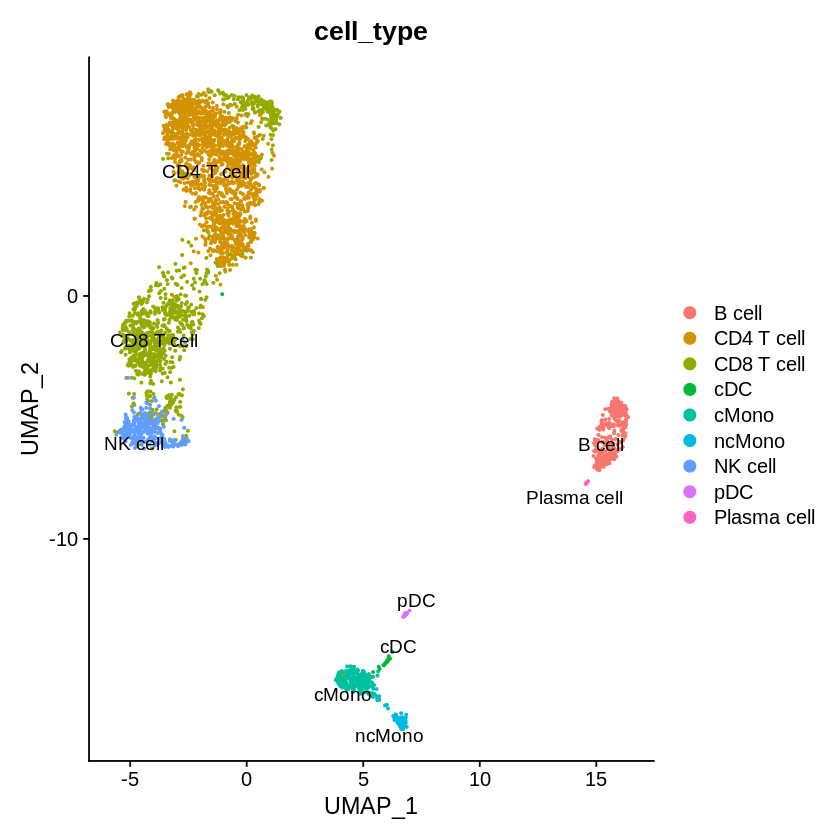

In [4]:
DimPlot(reference, group.by = "cell_type", label = TRUE, repel = TRUE)

In [5]:
reference <- getFeatureSpace(reference, "cell_type")

Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom



●  Extracting feature space for each cell type...
DONE!


In [6]:
reference <- trainModel(reference)

●  Training models for each cell type...


Loading required package: lattice

Loading required package: ggplot2



maximum number of iterations reached 0.0001246615 -0.0001236353DONE!


In [7]:
get_probabilities(reference) %>% head()

,CD8 T cell,CD4 T cell,cMono,B cell,NK cell,pDC,ncMono,cDC,Plasma cell
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CCACGGACATGCTGGC-1,0.999972427,4.374527e-06,3.794040e-05,2.054197e-04,3.282543e-06,1.730972e-05,7.900678e-10,4.410506e-05,0.0004745901
GATTCAGGTCTCCACT-1,0.040232926,9.895798e-01,9.892968e-07,4.599026e-05,1.313307e-05,4.461047e-06,1.946149e-08,1.061633e-06,0.0003212143
TGTATTCTCTATGTGG-1,0.039277298,7.582391e-03,7.244130e-01,1.139800e-02,8.467763e-03,2.715696e-02,2.584796e-01,5.065858e-02,0.0029593813
GTCTCGTGTTCACGGC-1,0.038144975,5.343345e-03,6.277683e-02,9.009564e-01,9.194227e-03,5.121673e-03,4.128189e-03,7.117298e-03,0.0019763056
TATCAGGCACCAACCG-1,0.999712408,2.757508e-06,8.968336e-06,4.018520e-05,4.676074e-04,1.815261e-05,6.904048e-09,1.137803e-05,0.0004271599
TTTGCGCAGTAAGTAC-1,0.007865811,9.934479e-01,1.630826e-07,8.345627e-05,2.592644e-04,3.494742e-06,1.833200e-12,4.403647e-08,0.0001559014


In [8]:
get_scpred(reference)

'scPred' object
✔  Prediction variable = cell_type 
✔  Discriminant features per cell type
✔  Training model(s)
Summary

|Cell type   |    n| Features|Method    |   ROC|  Sens|  Spec|
|:-----------|----:|--------:|:---------|-----:|-----:|-----:|
|B cell      |  280|       50|svmRadial | 1.000| 0.964| 1.000|
|CD4 T cell  | 1620|       50|svmRadial | 0.997| 0.971| 0.974|
|CD8 T cell  |  945|       50|svmRadial | 0.985| 0.901| 0.978|
|cDC         |   26|       50|svmRadial | 0.995| 0.547| 1.000|
|cMono       |  212|       50|svmRadial | 0.994| 0.958| 0.970|
|ncMono      |   79|       50|svmRadial | 0.998| 0.557| 1.000|
|NK cell     |  312|       50|svmRadial | 0.999| 0.929| 0.996|
|pDC         |   20|       50|svmRadial | 1.000| 0.700| 1.000|
|Plasma cell |    6|       50|svmRadial | 1.000| 0.800| 1.000|

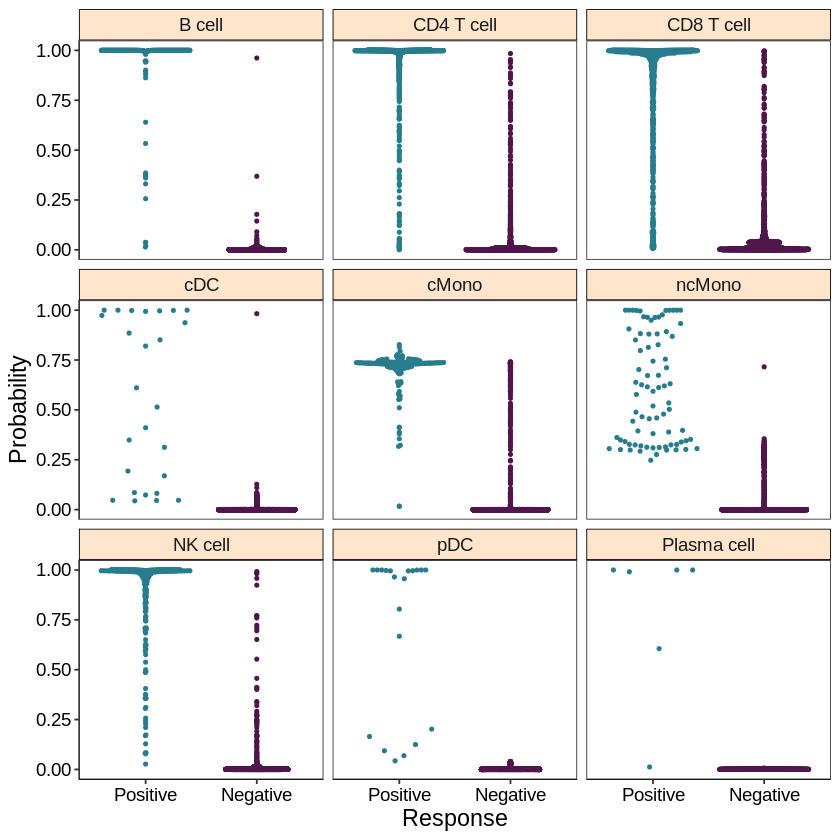

In [9]:
plot_probabilities(reference)

In [11]:
# lets improve the classification methods for cMONO and ncMONO
reference <- trainModel(reference, model = "mda", reclassify = c("cMono", "ncMono", "cDC"))

●  Training models for each cell type...


Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”


DONE!


In [12]:
get_scpred(reference)


'scPred' object
✔  Prediction variable = cell_type 
✔  Discriminant features per cell type
✔  Training model(s)
Summary

|Cell type   |    n| Features|Method    |   ROC|  Sens|  Spec|
|:-----------|----:|--------:|:---------|-----:|-----:|-----:|
|B cell      |  280|       50|svmRadial | 1.000| 0.964| 1.000|
|CD4 T cell  | 1620|       50|svmRadial | 0.997| 0.971| 0.974|
|CD8 T cell  |  945|       50|svmRadial | 0.985| 0.901| 0.978|
|cDC         |   26|       50|mda       | 0.999| 0.800| 0.999|
|cMono       |  212|       50|mda       | 0.999| 0.986| 0.997|
|ncMono      |   79|       50|mda       | 1.000| 0.949| 0.999|
|NK cell     |  312|       50|svmRadial | 0.999| 0.929| 0.996|
|pDC         |   20|       50|svmRadial | 1.000| 0.700| 1.000|
|Plasma cell |    6|       50|svmRadial | 1.000| 0.800| 1.000|

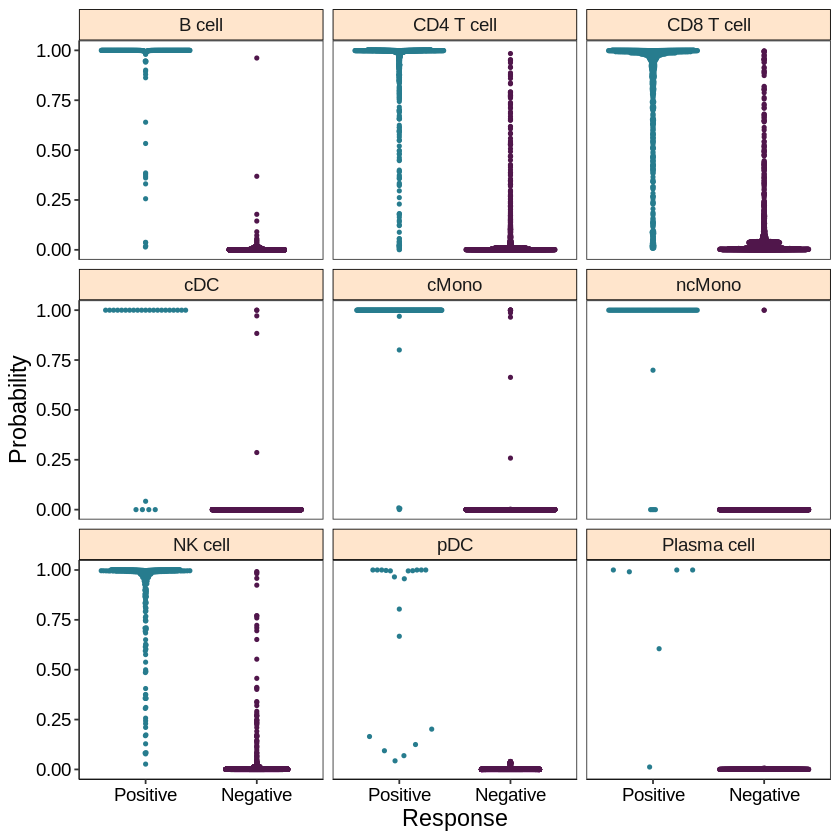

In [13]:
plot_probabilities(reference)

## Apply Model on new data

In [15]:
query <- NormalizeData(query)

In [16]:
query <- scPredict(query, reference)

●  Matching reference with new dataset...
	 ─ 2000 features present in reference loadings
	 ─ 2000 features shared between reference and new dataset
	 ─ 100% of features in the reference are present in new dataset
●  Aligning new data to reference...


Harmony 1/20

Harmony 2/20

Harmony 3/20

Harmony 4/20

Harmony 5/20

Harmony 6/20

Harmony 7/20

Harmony 8/20

Harmony 9/20

Harmony converged after 9 iterations



●  Classifying cells...
DONE!


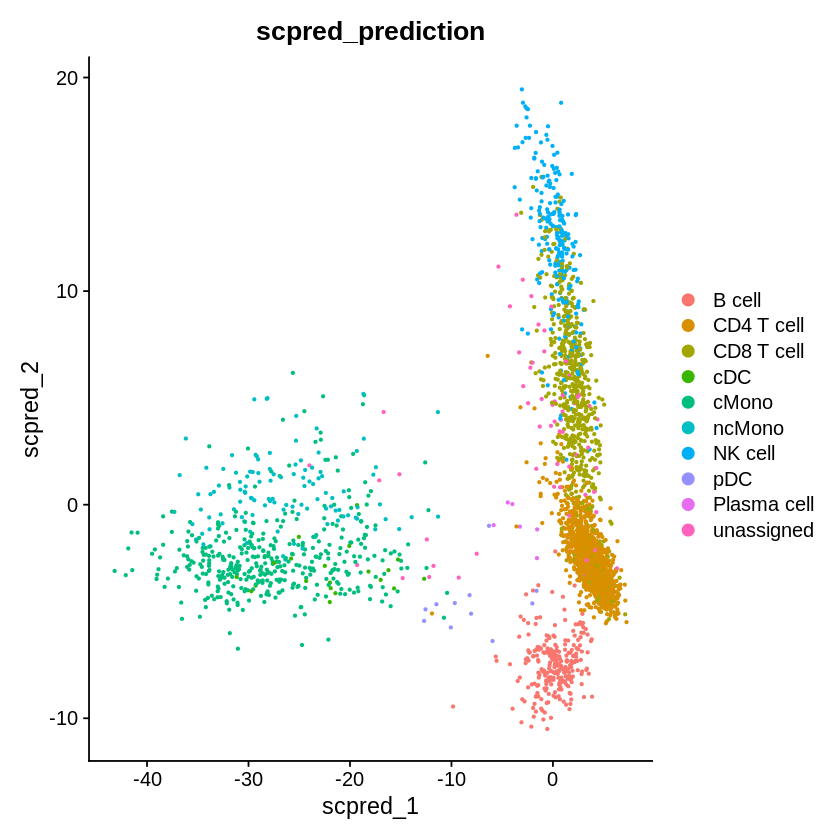

In [17]:
DimPlot(query, group.by = "scpred_prediction", reduction = "scpred")

In [18]:
query <- RunUMAP(query, reduction = "scpred", dims = 1:30)

16:00:56 UMAP embedding parameters a = 0.9922 b = 1.112

16:00:56 Read 3000 rows and found 30 numeric columns

16:00:56 Using Annoy for neighbor search, n_neighbors = 30

16:00:56 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:00:56 Writing NN index file to temp file /tmp/RtmprKvRYl/file4c5173005ddbc

16:00:56 Searching Annoy index using 1 thread, search_k = 3000

16:00:57 Annoy recall = 100%

16:00:57 Commencing smooth kNN distance calibration using 1 thread

16:00:58 Initializing from normalized Laplacian + noise

16:00:58 Commencing optimization for 500 epochs, with 134562 positive edges

16:01:11 Optimization finished



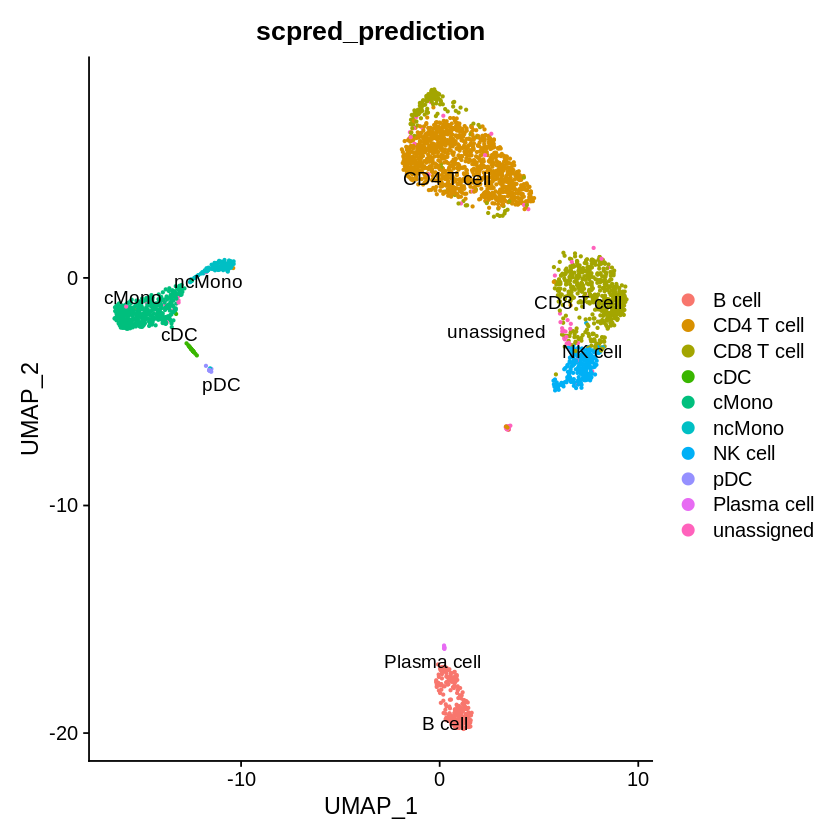

In [19]:
DimPlot(query, group.by = "scpred_prediction", label = TRUE, repel = TRUE)

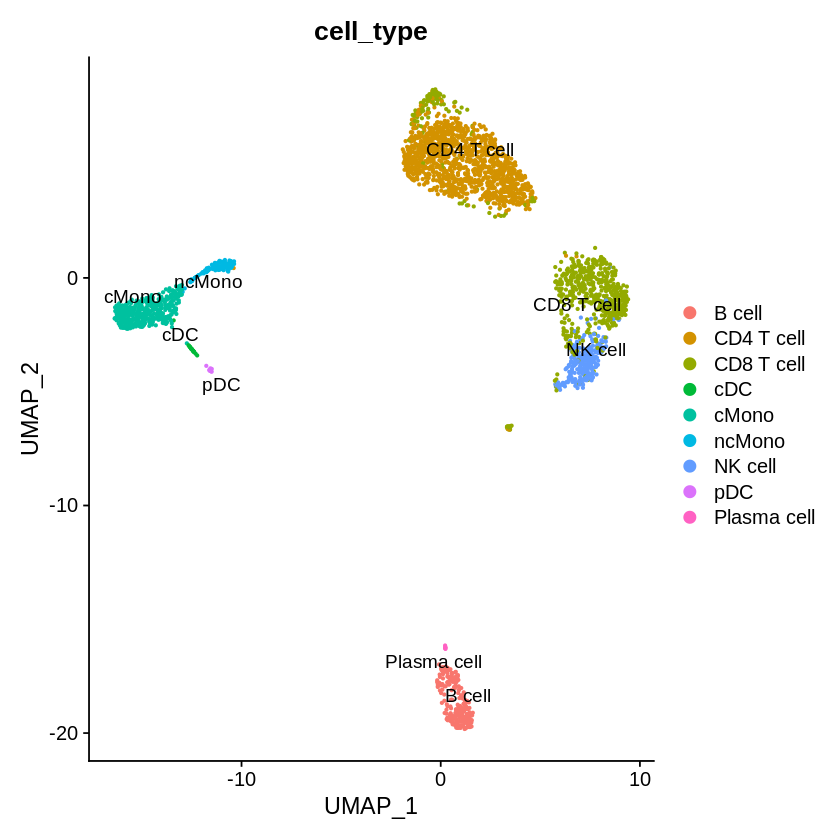

In [20]:
DimPlot(query, group.by = "cell_type", label = TRUE, repel = TRUE)

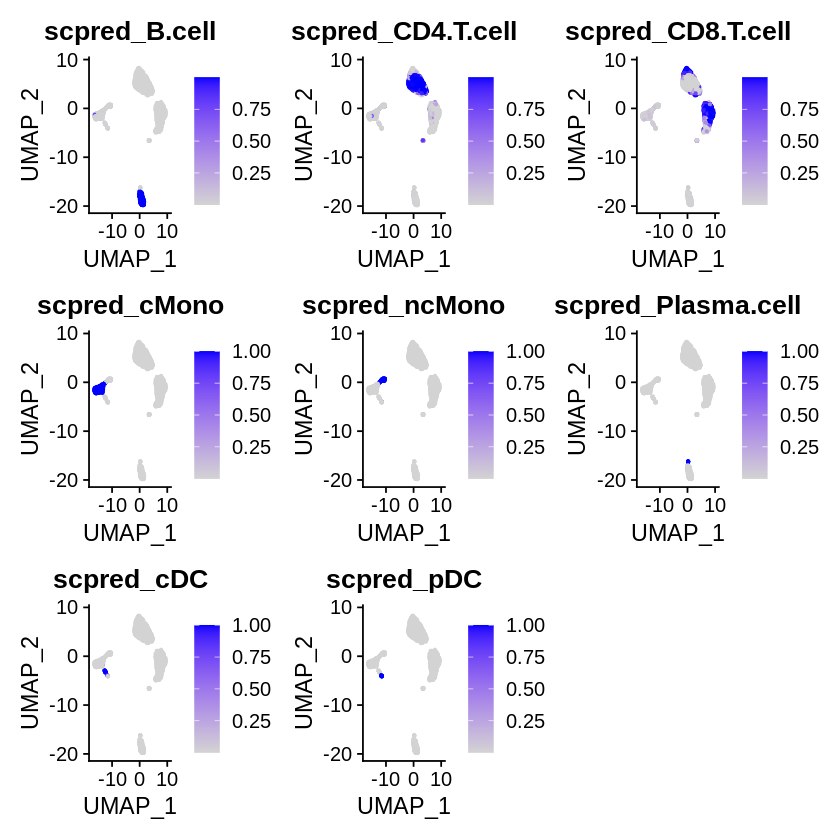

In [21]:
FeaturePlot(query, c("scpred_B.cell", "scpred_CD4.T.cell", "scpred_CD8.T.cell", 
                     "scpred_cMono", "scpred_ncMono", "scpred_Plasma.cell", 
                     "scpred_cDC", "scpred_pDC"))

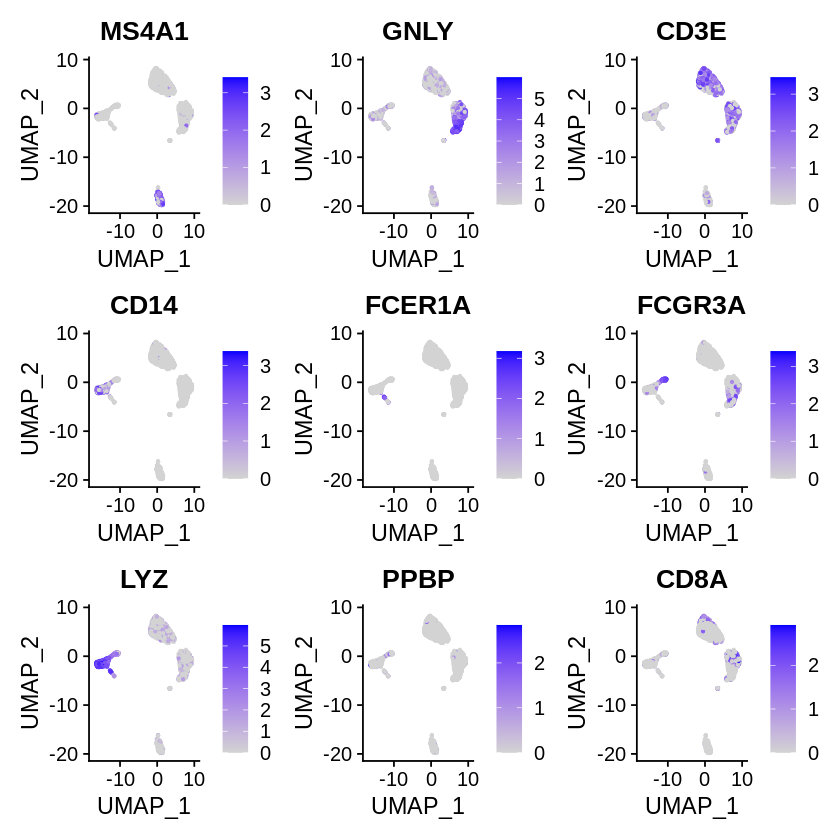

In [24]:
FeaturePlot(query, features = c("MS4A1", "GNLY", "CD3E", "CD14", "FCER1A", "FCGR3A", "LYZ", "PPBP",
    "CD8A"))

In [22]:
crossTab(query, "cell_type", "scpred_prediction")

,B cell,CD4 T cell,CD8 T cell,cDC,cMono,ncMono,NK cell,pDC,Plasma cell
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
B cell,250,0,0,0,0,0,0,0,0
CD4 T cell,0,1179,24,0,1,0,0,0,0
CD8 T cell,0,45,601,0,0,0,39,0,0
cDC,0,0,0,19,2,0,0,0,0
cMono,0,0,0,1,396,3,0,0,0
ncMono,0,0,0,0,0,115,0,1,0
NK cell,0,0,11,0,0,0,230,0,0
pDC,0,0,0,0,0,0,0,11,0
Plasma cell,0,0,0,0,0,0,0,0,6


In [23]:
crossTab(query, "cell_type", "scpred_prediction", output = "prop")

,B cell,CD4 T cell,CD8 T cell,cDC,cMono,ncMono,NK cell,pDC,Plasma cell
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B cell,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
CD4 T cell,0,0.95,0.04,0.00,0.00,0.00,0.00,0.00,0
CD8 T cell,0,0.04,0.89,0.00,0.00,0.00,0.14,0.00,0
cDC,0,0.00,0.00,0.95,0.00,0.00,0.00,0.00,0
cMono,0,0.00,0.00,0.05,0.97,0.03,0.00,0.00,0
ncMono,0,0.00,0.00,0.00,0.00,0.97,0.00,0.08,0
NK cell,0,0.00,0.02,0.00,0.00,0.00,0.85,0.00,0
pDC,0,0.00,0.00,0.00,0.00,0.00,0.00,0.92,0
Plasma cell,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
